In [5]:
!pip install ucimlrepo
# Instala libreria de jupyter

In [6]:
from ucimlrepo import fetch_ucirepo # Invoca funcion

# Descarga dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features #Tabla variables cilindros
y = auto_mpg.data.targets  #Columna objetivo millas por galon


In [7]:
X.head() # Muestra 1ras. 5 variables x


,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [8]:
y.head() #Muestar 1ras 5 variables y


,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [9]:
X.info() #Resume columnas: datos, etc


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


In [10]:
y.info() #Igual a La anerior, pero para columna objetivo


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [11]:
import pandas as pd #carga pandas

df = pd.concat([X, y], axis=1).dropna() # Junta X e Y en una tabla y borra valores perdidos


In [12]:
df.info()
 #Muestra resumen dataframe limpio

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
 5   model_year    392 non-null    int64  
 6   origin        392 non-null    int64  
 7   mpg           392 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


In [13]:
X = df.drop('mpg', axis=1) #Guarda en X columnas, sin var predictoras
y = df['mpg'] #Guarda en Y solo mpg


In [14]:
from sklearn.model_selection import train_test_split #Parte datos

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=1 #80 entrena, 20 prueba
)


In [15]:
print(X_train.shape) #Muestra entrenamiento
print(X_test.shape) #Muestra prueba


(313, 7)
(79, 7)


In [27]:
from sklearn.preprocessing import StandardScaler  # importa el escalamiento
scaler = StandardScaler()               # crea el objeto
X_train = scaler.fit_transform(X_train)  # ajusta la media/desv. con entrenamiento y lo transforma
X_test = scaler.transform(X_test)  # aplica el mismo ajuste a test (sin recalcular)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# crea red neuronal secuencial
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # capa 1: 64 neuronas
    Dense(32, activation='relu'),                                 # capa 2: 32
    Dense(16, activation='relu'),                                 # capa 3: 16
    Dense(1)                                                      # salida: 1 neurona (regresión)
])

In [28]:
from tensorflow.keras.optimizers import Adam   # importa optimizador
learning_rate = 0.001              # velocidad de ajuste pequeña
adam_optimizer = Adam(learning_rate=learning_rate)  # crea objetoimizador Adam contasa 0.001

In [30]:
model.compile(
    optimizer=adam_optimizer,        # Optimizador Adam
    loss='mean_squared_error',       # Error de perdida
    metrics=['RootMeanSquaredError'] # métrica correcta
)

In [21]:
history = model.fit(
    X_train, y_train,
    epochs=5, batch_size=1,
    validation_data=(X_test, y_test)
)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 549.2385 - root_mean_squared_error: 23.3438 - val_loss: 43.4328 - val_root_mean_squared_error: 6.5904
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 18.8407 - root_mean_squared_error: 4.3283 - val_loss: 20.8607 - val_root_mean_squared_error: 4.5673
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 11.8195 - root_mean_squared_error: 3.4186 - val_loss: 15.0772 - val_root_mean_squared_error: 3.8829
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 11.6518 - root_mean_squared_error: 3.3937 - val_loss: 13.3160 - val_root_mean_squared_error: 3.6491
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.6546 - root_mean_squared_error: 2.7557 - val_loss: 11.8824 - val_root_mean_squared_error: 3.4471


In [ ]:
history = model.fit(
    X_train, y_train,           # Entrenamiento
    epochs=5,                   # 5 Epoca
    batch_size=1,
    validation_data=(X_test, y_test)  # evalúa  test por época
)

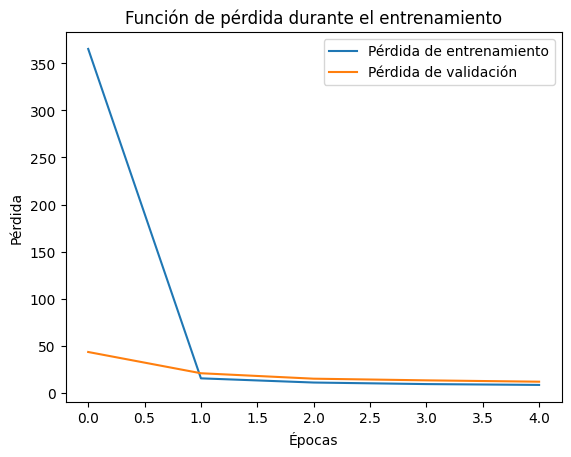

In [31]:
import matplotlib.pyplot as plt # librería de gráficos
plt.plot(history.history['loss'], label='Pérdida de entrenamiento') # curva de error en datos de entrenamiento
plt.plot(history.history['val_loss'], label='Pérdida de validación')# curva de error en datos de validación
plt.xlabel('Épocas')       # etiqueta eje horizontal
plt.ylabel('Pérdida')      # etiqueta eje vertical
plt.legend()               # muestra leyendas
plt.title('Función de pérdida durante el entrenamiento')    # título del gráfico
plt.show()           # dibuja la figura

In [32]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)  # evalúa en test; devuelve pérdida y MAE
print(f'Test Mean Absolute Error: {test_mae:.2f}')  # muestra el error medio absoluto

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - RootMeanSquaredError: 3.3545 - loss: 11.2708
Test Mean Absolute Error: 3.45


In [34]:
predictions = model.predict(X_test) # predice mpg para el conjunto de test
comparison = pd.DataFrame({'Actual': y_test, # valores reales
                           'Predicted': predictions.flatten()}) # valores predichos (aplanados a 1D)
print(comparison.head()) # muestra las 5 primeras filas

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
     Actual  Predicted
82     23.0  21.595121
167    29.0  26.964668
356    32.4  33.020752
120    19.0  17.341072
385    38.0  36.856201


In [25]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, predictions)
print(f'R²: {r2}')

mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')


R²: 0.8285923752092501
MSE: 11.882366550217908


In [36]:
from sklearn.metrics import r2_score, mean_squared_error  # importa métricas
r2 = r2_score(y_test, predictions) # R²: 1 = predicción, 0 = usa la media
print(f'R²: {r2:.3f}') # coeficiente de determinación

mse = mean_squared_error(y_test, predictions)  # MSE: error cuadrático medio
print(f'MSE: {mse:.3f}')

R²: 0.829
MSE: 11.882
